In [3]:
import requests
import json
import matplotlib.pyplot as plt

headers = {
	"x-rapidapi-host": "api-nba-v1.p.rapidapi.com",
	"x-rapidapi-key": "61ec54c2e9msh0578e0c47cbfd23p1259fcjsnd75b76f6144c"
}

playerLastName = input("Enter the last name of the desired player: ") 

playerInfo = requests.get("https://api-nba-v1.p.rapidapi.com/players/lastName/"+playerLastName, headers=headers).json()

while playerInfo["api"]["results"] == 0:
	playerLastName = input("Enter a valid last name: ") 
	playerInfo = requests.get("https://api-nba-v1.p.rapidapi.com/players/lastName/"+playerLastName, headers=headers).json()

print(playerInfo)

Enter the last name of the desired player: tatum
{'api': {'status': 200, 'message': 'GET players/lastName/tatum', 'results': 1, 'filters': ['playerId', 'teamId', 'league', 'country', 'lastName', 'firstName'], 'players': [{'firstName': 'Jayson', 'lastName': 'Tatum', 'teamId': '2', 'yearsPro': '2', 'collegeName': 'Duke', 'country': 'USA', 'playerId': '882', 'dateOfBirth': '1998-03-03', 'affiliation': 'Duke/USA', 'startNba': '2017', 'heightInMeters': '2.03', 'weightInKilograms': '95.3', 'leagues': {'standard': {'jersey': '0', 'active': '1', 'pos': 'F-G'}}}]}}


In [4]:
playerId = playerInfo["api"]["players"][0]["playerId"]

In [5]:
playerStats = requests.get("https://api-nba-v1.p.rapidapi.com/statistics/players/playerId/" + str(playerId), headers=headers)


Enter the last name of the desired player: james
Enter the desired statistic: offReb
Enter the desired number of games: 4
Average offReb Per Game: 0.75


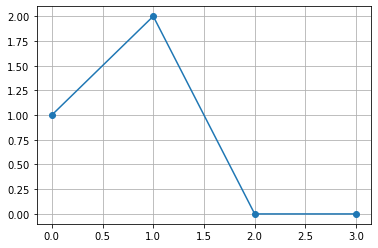

In [10]:
recentGames = playerStats.json()["api"]["statistics"] 
points = []

stats = ['points', 'pos', 'min', 'fgm', 'fga', 'fgp', 'ftm', 'fta', 'ftp', 'tpm', 'tpa', 'tpp', 'offReb', 'defReb', 'totReb', 'assists', 'pFouls', 'steals', 'turnovers', 'blocks', 'plusMinus']


playerLastName = input("Enter the last name of the desired player: ") 
desiredStat = input("Enter the desired statistic: ")
while desiredStat not in stats:
  desiredStat = input("Invalid statistic, reselect: ")

numberOfGames = input("Enter the desired number of games: ")
while numberOfGames.isdigit() and int(numberOfGames) < 1:
  numberOfGames = input("Number of games must be positive integer, re-enter:")

numberOfGames = int(numberOfGames)

for i in range(numberOfGames):
  point = recentGames[i][desiredStat]
  if point != "":
    points.append(int(recentGames[i][desiredStat]))

plt.plot(points, marker='o')
plt.grid()
print("Average "+ desiredStat +" Per Game: " + str(sum(points) / len(points))) 